In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('./data/AirQaulity_ffill.csv',parse_dates=True, index_col=0)
data.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
date,,,,,,,,,,,,,
2004-03-04 00:00:00,1.6,1254.0,139.0,9.0,941.0,98.0,828.0,106.0,1566.0,1270.0,17.1,51.8,0.9990
2004-03-04 01:00:00,1.3,1141.0,98.0,6.3,827.0,73.0,936.0,88.0,1488.0,1110.0,16.2,54.2,0.9933
2004-03-04 02:00:00,1.2,1141.0,88.0,5.3,777.0,69.0,986.0,83.0,1455.0,1060.0,15.1,58.2,0.9886
2004-03-04 03:00:00,0.9,1042.0,66.0,3.8,697.0,-200.0,1056.0,-200.0,1410.0,965.0,15.1,57.6,0.9796
2004-03-04 04:00:00,0.8,986.0,57.0,3.0,651.0,60.0,1145.0,74.0,1380.0,891.0,14.5,58.0,0.9488


In [19]:
# 1,2, 전처리 내용을 합한 함수
def load_data():
    df = pd.read_csv('./data/AirQualityUCI/AirQualityUCI.csv',delimiter=';')
    
    # 비어있는 열 제거
    df = df.drop(columns=['Unnamed: 15','Unnamed: 16'])
    
    # 날짜 시간 합친 인덱스 설정
    df['Time'] = df['Time'].str.replace(".",":")
    df['date'] = pd.to_datetime(df['Date'] +" "+ df['Time'])
    df = df.drop(columns=['Date','Time'])
    
    df = df.sort_values('date')
    df = df.set_index('date')
    
    # object -> float
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].str.replace(",",".")
        df[col] = pd.to_numeric(df[col])
        
    # 컬럼 이름 변경
    new_cols = ['CO_true','CO_sensor',
            'NMHC_true','C6H6_true',
            'NMHC_sensor','NOx_true',
           'NOx_sensor','NO2_true',
           'NO2_sensor','O3_sensor',
           'T','RH','AH']
    
    df.columns = new_cols
    
    # 기간 설정
    df = data.loc["2004-03-04":"2005-03-04"].copy()
    
    # 음수값 제거
    df = df[df['CO_sensor']>0]
    
    # 1시간 간격으로 맞추기 + 채우기
    df_ = df.asfreq("1H")
    df_ = df_.fillna(method='ffill')
    
    return df_

In [73]:
# df = load_data()
# df.head()

In [74]:
df = pd.read_csv('./data/AirQualityUCI_1.csv', parse_dates=['date'],index_col=0)
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
date,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593
2004-01-04 01:00:00,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652
2004-01-04 02:00:00,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630
2004-01-04 03:00:00,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394
2004-01-04 04:00:00,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299


In [21]:
len(df)

8784

<AxesSubplot:xlabel='date'>

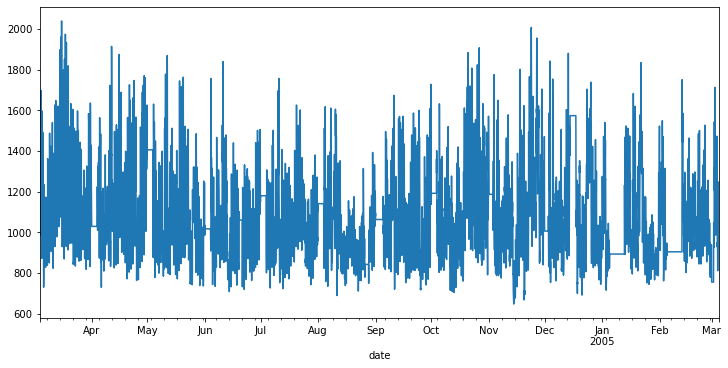

In [22]:
# 시각화로 확인
fig, axs = plt.subplots(figsize=(10,5), constrained_layout=True)
df['CO_sensor'].plot(ax=axs)

# EDA

* 2005년 2월 한달 동안의 CO_sensor 의 수치를 예측
* 아쉽게 2005년 데이터에 Nan값이 많아 가능하다면 보간법으로 채워줄 예정

## CO_sensor

In [23]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.day_of_week
df['hour'] = df.index.hour

# 주말여부
df['is_weekend'] = np.where(df['day_of_week']>4,1,0)

In [24]:
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH,year,month,day,day_of_week,hour,is_weekend
date,,,,,,,,,,,,,,,,,,,
2004-03-04 00:00:00,1.6,1254.0,139.0,9.0,941.0,98.0,828.0,106.0,1566.0,1270.0,17.1,51.8,0.9990,2004,3,4,3,0,0
2004-03-04 01:00:00,1.3,1141.0,98.0,6.3,827.0,73.0,936.0,88.0,1488.0,1110.0,16.2,54.2,0.9933,2004,3,4,3,1,0
2004-03-04 02:00:00,1.2,1141.0,88.0,5.3,777.0,69.0,986.0,83.0,1455.0,1060.0,15.1,58.2,0.9886,2004,3,4,3,2,0
2004-03-04 03:00:00,0.9,1042.0,66.0,3.8,697.0,-200.0,1056.0,-200.0,1410.0,965.0,15.1,57.6,0.9796,2004,3,4,3,3,0
2004-03-04 04:00:00,0.8,986.0,57.0,3.0,651.0,60.0,1145.0,74.0,1380.0,891.0,14.5,58.0,0.9488,2004,3,4,3,4,0


<AxesSubplot:xlabel='month', ylabel='CO_sensor'>

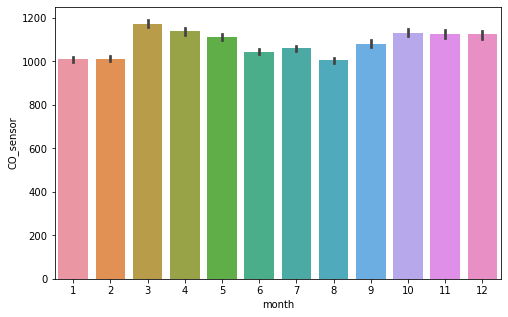

In [25]:
# 월별
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='month', y='CO_sensor')

<AxesSubplot:xlabel='day_of_week', ylabel='CO_sensor'>

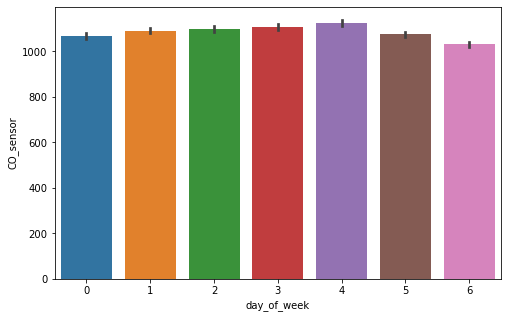

In [26]:
# 요일별
# 주말에 적을 것이라 생각했지만 별 차이 없음
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='day_of_week', y='CO_sensor')

<AxesSubplot:xlabel='hour', ylabel='CO_sensor'>

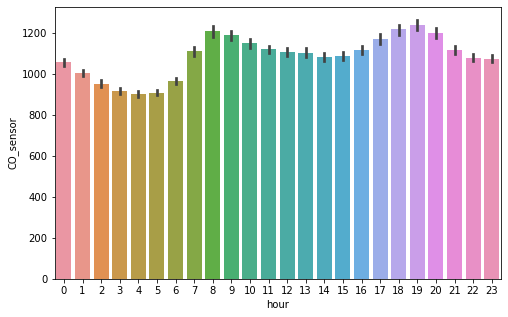

In [27]:
# 시간별
# 새벽에 적고 출퇴근 시간에 많아짐
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='hour', y='CO_sensor')

In [ ]:
# barplot 으로 잘 나타나지 않음

## all_data

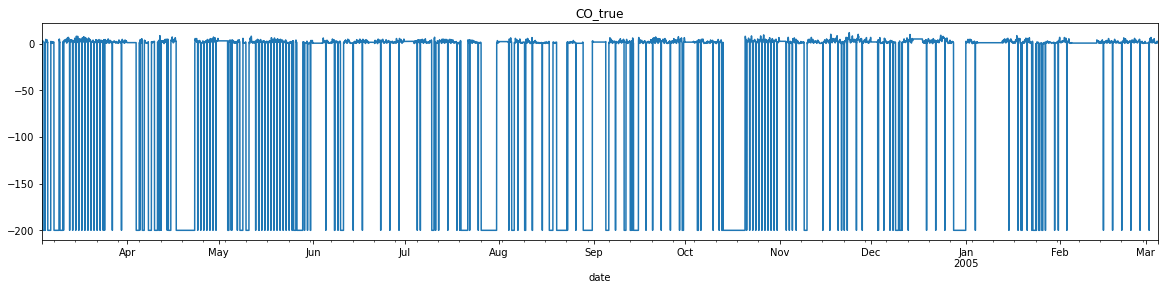

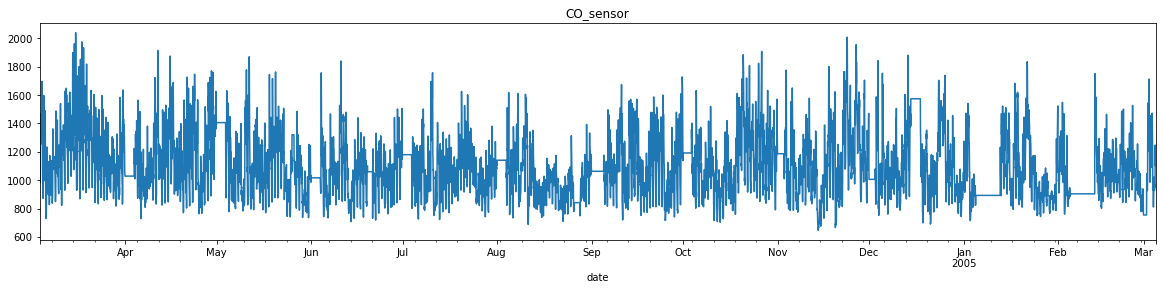

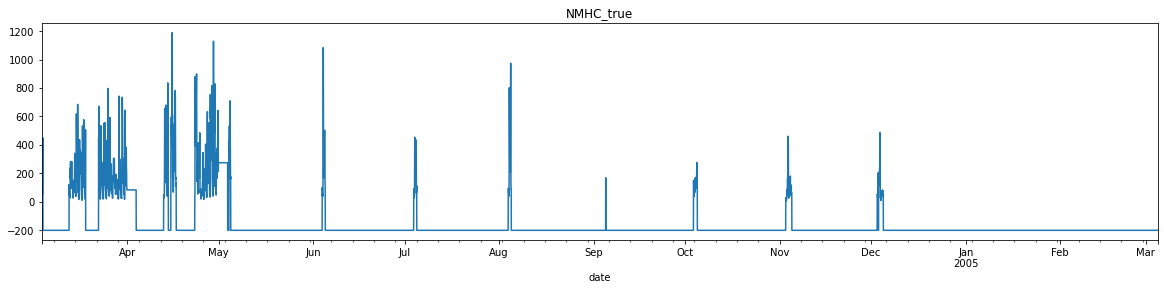

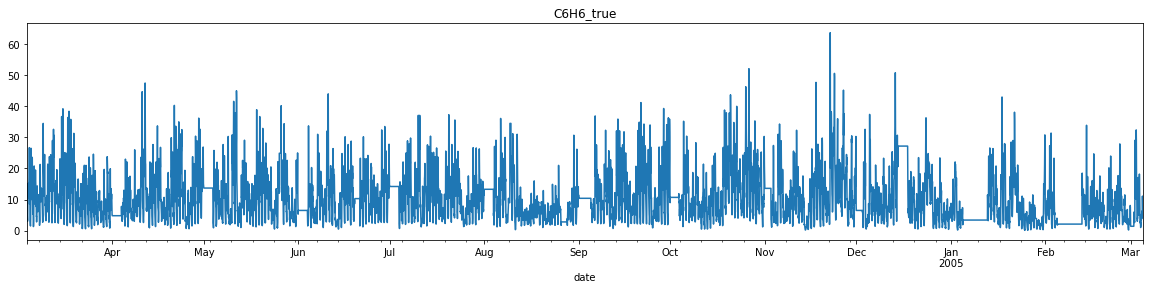

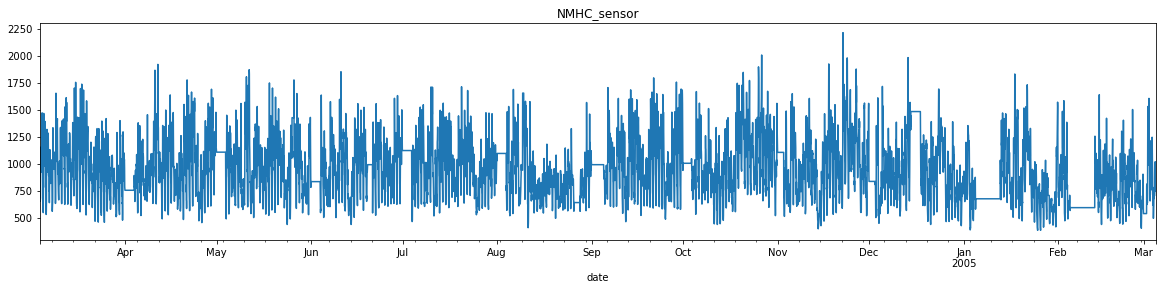

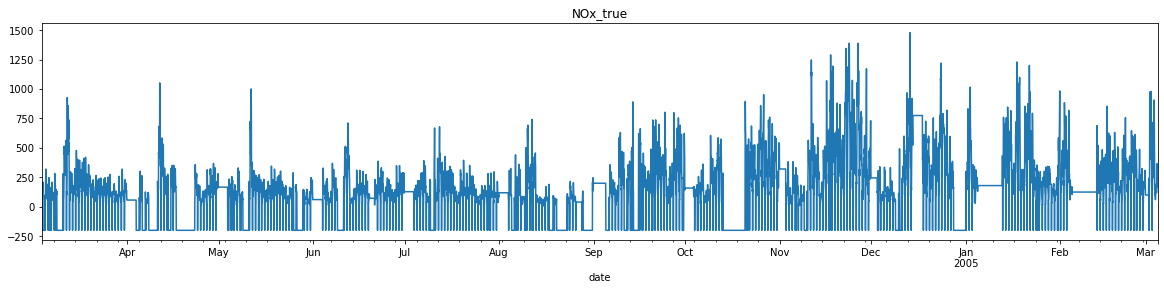

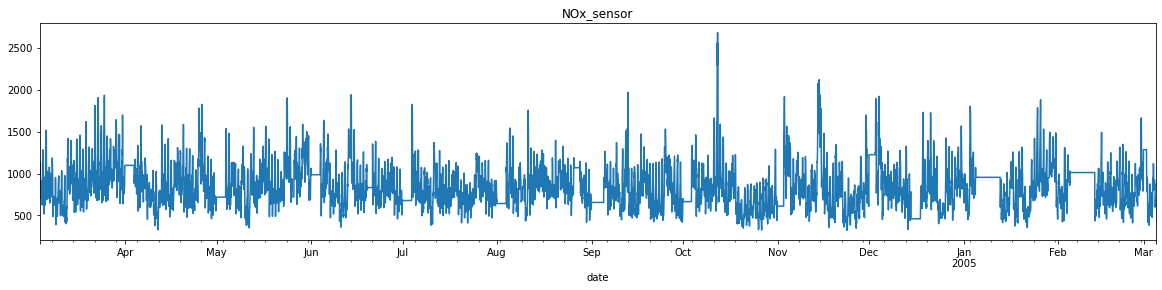

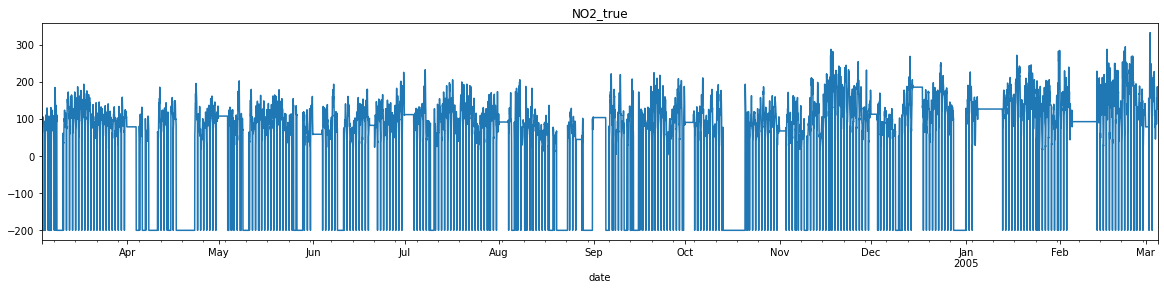

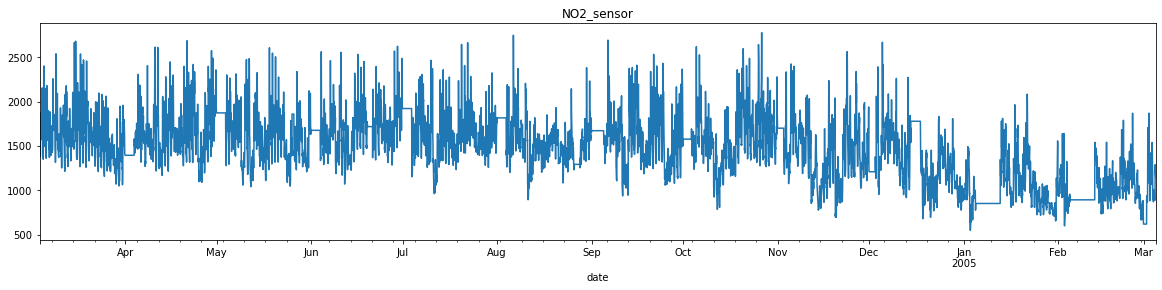

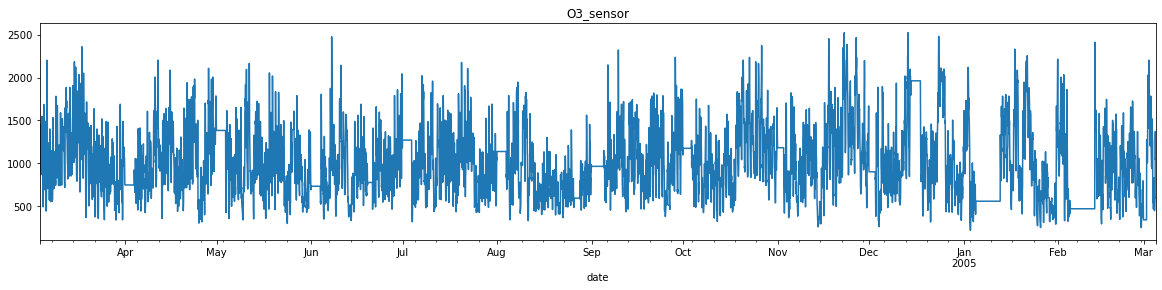

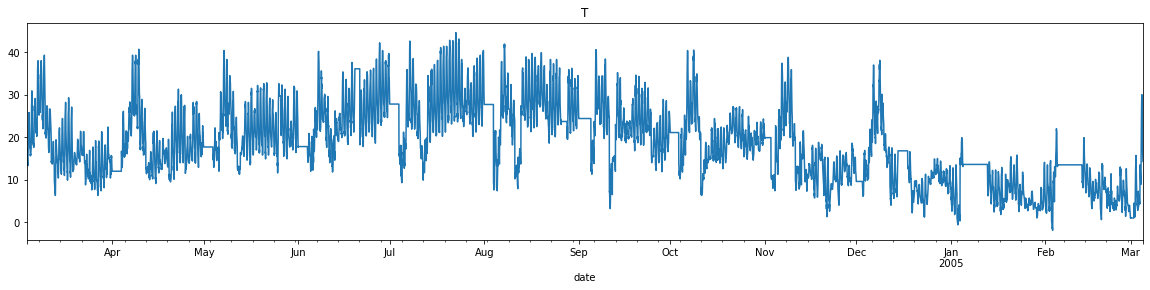

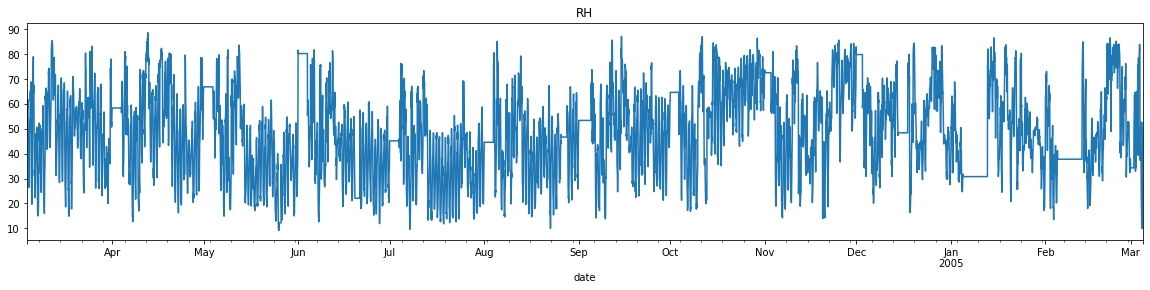

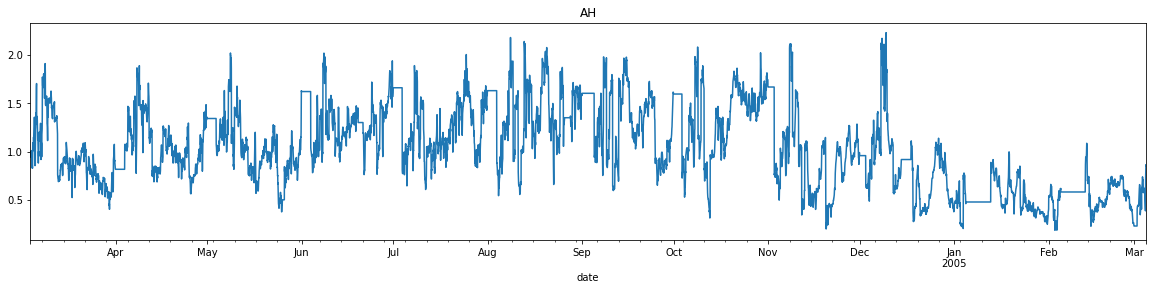

In [39]:
df = data.copy()
for col in df.columns:
    df[col].plot(figsize=(20,4))
    plt.title(col)
    plt.show()

## Daily seasonality

In [57]:
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH,date,time_of_day,month,year,week_of_year,day_of_week
date,,,,,,,,,,,,,,,,,,,
2004-03-04 00:00:00,1.6,1254.0,139.0,9.0,941.0,98.0,828.0,106.0,1566.0,1270.0,17.1,51.8,0.9990,2004-03-04,0,3,2004,10,3
2004-03-04 01:00:00,1.3,1141.0,98.0,6.3,827.0,73.0,936.0,88.0,1488.0,1110.0,16.2,54.2,0.9933,2004-03-04,1,3,2004,10,3
2004-03-04 02:00:00,1.2,1141.0,88.0,5.3,777.0,69.0,986.0,83.0,1455.0,1060.0,15.1,58.2,0.9886,2004-03-04,2,3,2004,10,3
2004-03-04 03:00:00,0.9,1042.0,66.0,3.8,697.0,-200.0,1056.0,-200.0,1410.0,965.0,15.1,57.6,0.9796,2004-03-04,3,3,2004,10,3
2004-03-04 04:00:00,0.8,986.0,57.0,3.0,651.0,60.0,1145.0,74.0,1380.0,891.0,14.5,58.0,0.9488,2004-03-04,4,3,2004,10,3


In [44]:
df['date'] = df.index.date
df['time_of_day'] = df.index.hour
df['month'] = df.index.month
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.day_of_week

In [46]:
[col for col in df.columns if 'sensor' in col]

['CO_sensor', 'NMHC_sensor', 'NOx_sensor', 'NO2_sensor', 'O3_sensor']

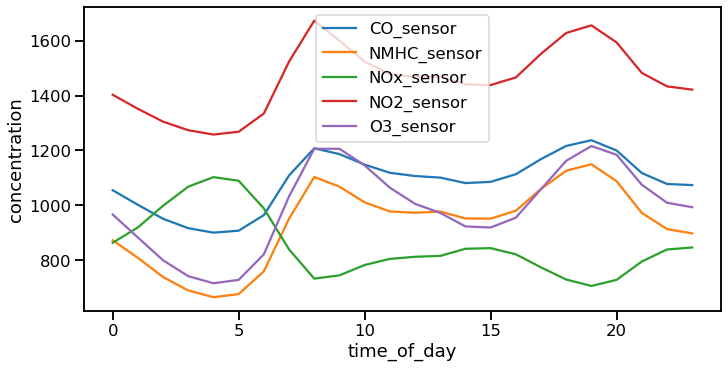

In [55]:
# sensor data
sns.set_context('talk')
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sensor_col = [col for col in df.columns if "sensor" in col]
for col in sensor_col:
    df_col = df.groupby('time_of_day').mean()
    sns.lineplot(x="time_of_day", y=col, data=df_col,
                 ax=ax,label=col)
    ax.set_ylabel("concentration")
    ax.legend()

Text(0, 0.5, 'AH')

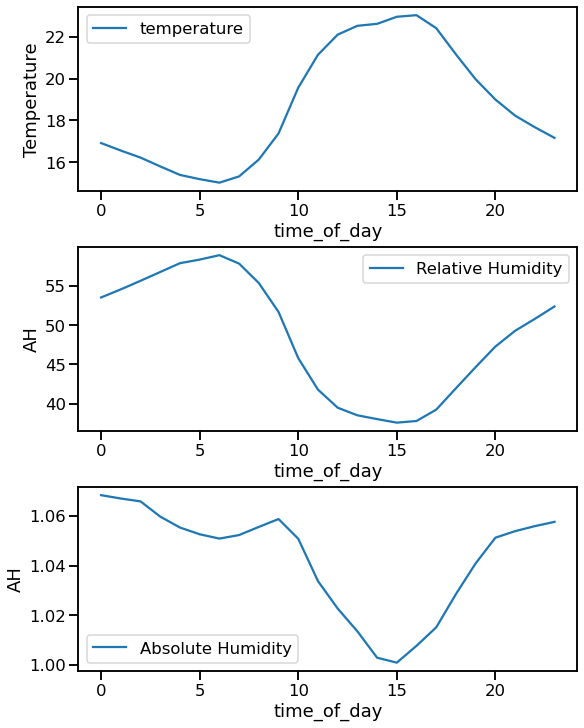

In [63]:
# Temperature
fig, axs = plt.subplots(nrows=3,figsize=(8,10),constrained_layout=True)
df_t = df.groupby("time_of_day").mean()
sns.lineplot(x="time_of_day", y="T",data=df_t,
             label="temperature",ax=axs[0])
axs[0].set_ylabel("Temperature")

sns.lineplot(x="time_of_day", y="RH", data=df_t,
            label="Relative Humidity",ax=axs[1])
axs[1].set_ylabel('RH')

sns.lineplot(x="time_of_day", y="AH", data=df_t,
            label="Absolute Humidity",ax=axs[2])
axs[1].set_ylabel('AH')

In [ ]:
cmap = sns.color_palette("Blues", n_colors=5)
variables= ["CO_sensor",
           "NMHC_sensor",
           "NOX_sensor",
           "NO2_sensor",
           "o3_sensor",
           "T",
           "RH"]

for var in variables:
    fig, axs = plt.subplots(figsize=(10,5))

<AxesSubplot:xlabel='time_of_day'>

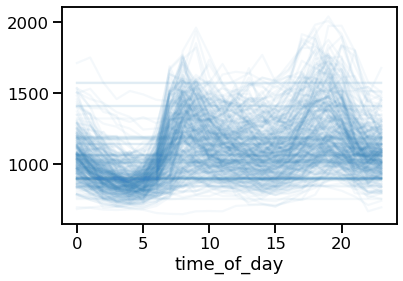

In [72]:
cmap = sns.color_palette("Blues", n_colors=5)
df.pivot(index=["time_of_day"] ,columns=["date"])['CO_sensor'].plot(legend=False, alpha=0.05, color=cmap[3])

## Weekly Seasonality

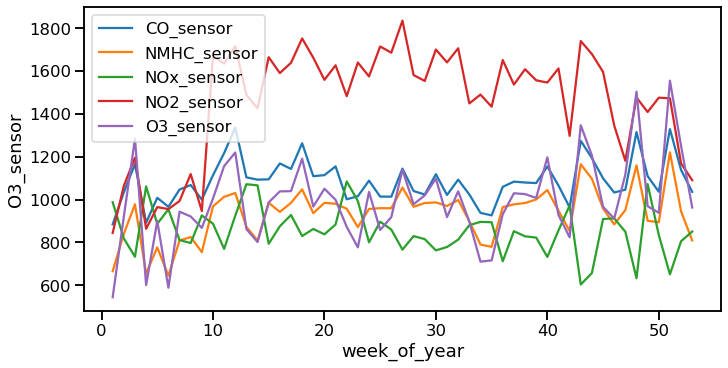

In [65]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
for col in sensor_col:
    df_week = df.groupby('week_of_year').mean()
    sns.lineplot(x="week_of_year", y=col, data=df_week,
                label=col,ax=ax)
    ax.set_ylabel(col)